In [5]:
import pandas as pd
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine, text
from sqlalchemy.engine import Engine
from sqlalchemy.orm import sessionmaker

In [38]:
load_dotenv()

PG_USER = os.getenv("DB_USER", "postgres")
PG_PASS = os.getenv("DB_PASSWORD", "postgres")
PG_HOST = os.getenv("DB_HOST", "localhost")
PG_PORT = os.getenv("DB_PORT", "5432")
PG_DB   = os.getenv("DB_DATABASE", "postgres")

DATABASE_URL = f"postgresql+psycopg2://{PG_USER}:{PG_PASS}@{PG_HOST}:{PG_PORT}/{PG_DB}"

In [39]:
engine: Engine = create_engine(
    DATABASE_URL,
    pool_pre_ping=True,
    future=True,  # optional but nice with SA 2.x APIs
)

In [75]:
query = '''
Select *
from interactions
'''
interactions = pd.read_sql(query, engine)

In [76]:
interactions

,id,visitor_id,session_id,channel,page,interaction,element,timestamp
0,1,f476bb5c-d165-441c-88d7-302b5c349f3e,44a7f708-15d5-4c47-9fc2-3711e4932e9c,Paid,landing,pageview,None,2025-01-01 00:00:02.735515+00:00
1,2,f476bb5c-d165-441c-88d7-302b5c349f3e,44a7f708-15d5-4c47-9fc2-3711e4932e9c,Paid,landing,click,learn_more,2025-01-01 00:00:03.935515+00:00
2,3,f476bb5c-d165-441c-88d7-302b5c349f3e,44a7f708-15d5-4c47-9fc2-3711e4932e9c,Paid,landing,click,content,2025-01-01 00:00:04.135515+00:00
3,4,f476bb5c-d165-441c-88d7-302b5c349f3e,44a7f708-15d5-4c47-9fc2-3711e4932e9c,Paid,content,pageview,None,2025-01-01 00:00:04.135515+00:00
4,5,f476bb5c-d165-441c-88d7-302b5c349f3e,44a7f708-15d5-4c47-9fc2-3711e4932e9c,Paid,content,dropoff,None,2025-01-01 00:00:05.135515+00:00
...,...,...,...,...,...,...,...,...
30982,30983,e7cd295c-02bc-4344-b01a-bfd876f65108,6f177e00-335b-485c-b10c-7f8d010323de,Organic,landing,pageview,None,2025-01-01 23:59:32.238747+00:00
30983,30984,e7cd295c-02bc-4344-b01a-bfd876f65108,6f177e00-335b-485c-b10c-7f8d010323de,Organic,landing,dropoff,None,2025-01-01 23:59:33.238747+00:00
30984,30985,1a7a9c2f-95a8-434c-98b7-5cae2cbdfdc3,3c6bb681-04da-40c6-bd1b-ebe4378b6b2e,Organic,landing,pageview,None,2025-01-01 23:59:48.925810+00:00
30985,30986,1a7a9c2f-95a8-434c-98b7-5cae2cbdfdc3,3c6bb681-04da-40c6-bd1b-ebe4378b6b2e,Organic,landing,click,hero_cta,2025-01-01 23:59:50.125810+00:00


/var/folders/mb/ly5yy50j39b515wm77svz8sr0000gn/T/ipykernel_1328/167677900.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  arrivals.groupby([pd.Grouper(key='timestamp',freq='H')]).count().hist()


array([[<Axes: title={'center': 'visitor_id'}>]], dtype=object)

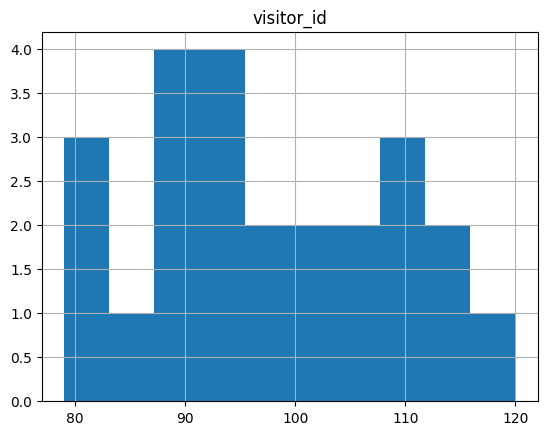

In [84]:
arrivals = interactions[['visitor_id','timestamp']].groupby('visitor_id').min().reset_index()
arrivals.groupby([pd.Grouper(key='timestamp',freq='H')]).count().hist()

In [85]:
query = '''
Select *
from visitors
'''
visitors = pd.read_sql(query, engine)

In [86]:
visitors['is_identified'].sum()

np.int64(1000)

In [87]:
visitors

,visitor_id,created_at,channel,is_identified,identified_at,name,gender,age,email,signed_up,sign_up_timestamp,return_visitor,marketing_funnel_stage,stage_last_updated_date,converted,converted_timestamp
0,ee3218e0-04f7-4182-97ac-d8f9e4b9e2d8,2025-01-01 00:00:00+00:00,None,False,NaT,None,None,NaN,None,False,NaT,False,Awareness,NaT,False,NaT
1,aafeec46-f1e2-4697-a643-c7aca16378aa,2025-01-01 00:00:00+00:00,None,False,NaT,None,None,NaN,None,False,NaT,False,Awareness,NaT,False,NaT
2,23c62f99-b6f9-45de-a56f-087a23f7ec9c,2025-01-01 00:00:00+00:00,None,False,NaT,None,None,NaN,None,False,NaT,False,Awareness,NaT,False,NaT
3,e1bd8ef1-7735-474f-ad6e-a564506d15d0,2025-01-01 00:00:00+00:00,None,False,NaT,None,None,NaN,None,False,NaT,False,Awareness,NaT,False,NaT
4,12d8c180-9a2f-4af9-a45e-939ff9de557d,2025-01-01 00:00:00+00:00,None,False,NaT,None,None,NaN,None,False,NaT,False,Awareness,NaT,False,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1a54c9d0-aefd-481a-87ce-9537eac2e53c,2025-01-01 00:00:00+00:00,Paid,True,2025-01-01 23:54:19.817843+00:00,Matthew Blevins,Other,58.0,jreynolds@example.net,True,2025-01-01 23:54:19.817843+00:00,False,Purchase,2025-01-01 23:54:22.617843+00:00,True,2025-01-01 23:54:22.617843+00:00
2346,637abf8e-11ec-4bce-bc58-7e967c4c38b9,2025-01-01 00:00:00+00:00,Organic,True,2025-01-01 23:55:16.711786+00:00,Blake Clark,Female,53.0,petergonzales@example.net,True,2025-01-01 23:55:16.711786+00:00,False,Consideration,2025-01-01 23:55:16.711786+00:00,False,NaT
2347,bfe43bf7-f137-49ef-abbc-1fdc232019ea,2025-01-01 00:00:00+00:00,Organic,True,2025-01-01 23:58:40.093354+00:00,Deanna Gregory,Male,18.0,coreyhartman@example.com,True,2025-01-01 23:58:40.093354+00:00,False,Purchase,2025-01-01 23:58:42.893354+00:00,True,2025-01-01 23:58:42.893354+00:00
2348,2162059c-3fe1-4290-a5e6-dfa9c723580a,2025-01-01 00:00:00+00:00,Referral,True,2025-01-01 23:58:49.244907+00:00,Crystal Jordan,Male,36.0,briannamoore@example.com,True,2025-01-01 23:58:49.244907+00:00,False,Consideration,2025-01-01 23:58:49.244907+00:00,False,NaT
